<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Classification_Performance_Metrics_with_Iris_Dataset_Sklearn_Builtin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

In [2]:
data = load_iris()
X = data.data
y = (data.target == 2).astype(int)  # Binary classification: Virginica vs others

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC Score:", auc)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC Score: 1.0


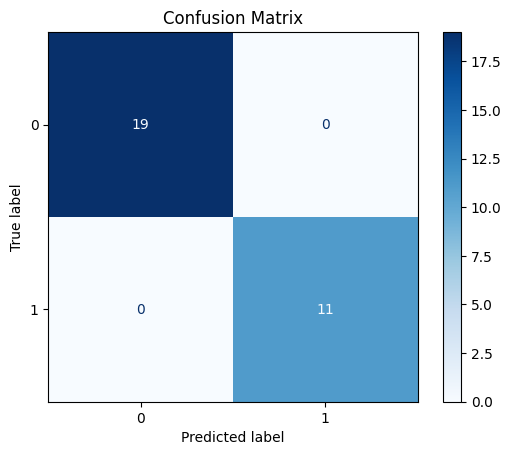

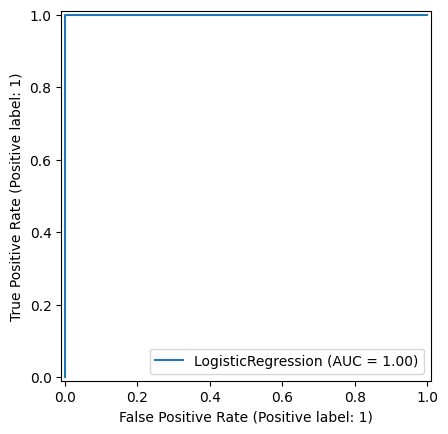

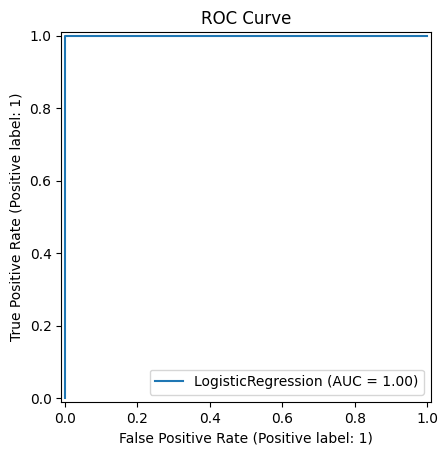

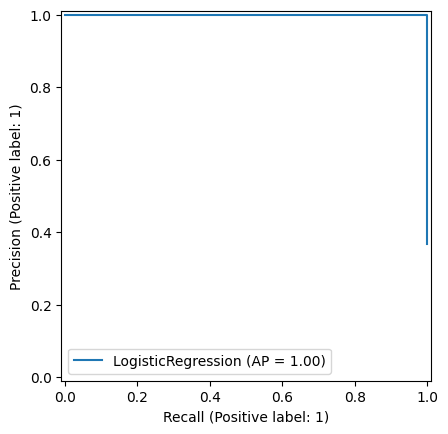

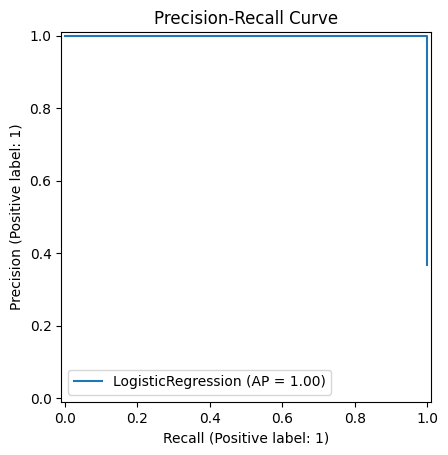

In [3]:
# Plot 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot 2: ROC Curve
disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
disp.plot()
plt.title('ROC Curve')
plt.show()

# Plot 3: Precision-Recall Curve
from sklearn.metrics import PrecisionRecallDisplay
disp = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()